```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

```
Last modified: 2021/08/15, @haewoon
```

## Lab: Twitter's Image Crop Algorithm (Used till 2020)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/haewoon/lab-image-crop-analysis/blob/master/notebooks/Lab%20-%20Image%20Crop%20Analysis.ipynb)


In [ ]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [ ]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/haewoon/lab-image-crop-analysis.git
    HOME_DIR = Path("./lab-image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

     |████████████████████████████████| 1.1 MB 8.0 MB/s 
     |████████████████████████████████| 3.7 MB 28.6 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 1.8 MB 42.1 MB/s 
     |████████████████████████████████| 357 kB 61.3 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100488 sha256=df5617bd74e772dab519b5eacb69db2381bddb11c78ccb8bd64709b18d277e01
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738997 sha256=470bed38ae13210ad29cfa79440091006620cbabd36e7077ad0a89fce01eed35
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319772 sha256=e7db266a39b60c8dd6c8f9b7d77bb1162e07842b387c0657507b672

True

lab-image-crop-analysis/data/mcconnell-obama.jpeg
lab-image-crop-analysis/data/obama-mcconnell.jpeg


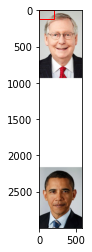

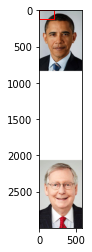

In [ ]:
for img_path in data_dir.glob("*.jpeg"):
  print (img_path)
  img = mpimg.imread(img_path)
  plt.figure()
  plt.imshow(img)
  plt.gca().add_patch(
      Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
  )

In [ ]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [ ]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

lab-image-crop-analysis/data/mcconnell-obama.jpeg
None 583 3000
lab-image-crop-analysis/data/obama-mcconnell.jpeg
None 583 3000


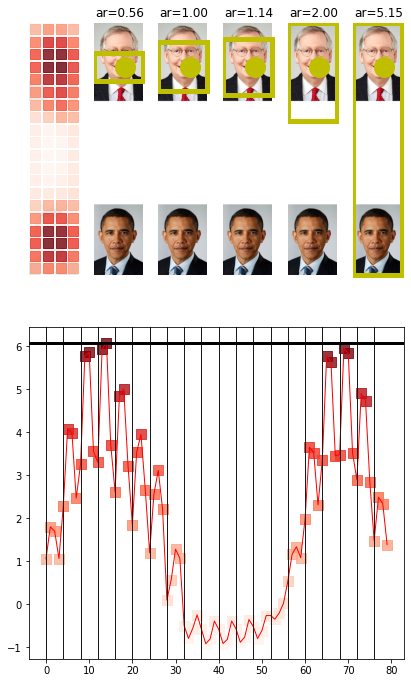

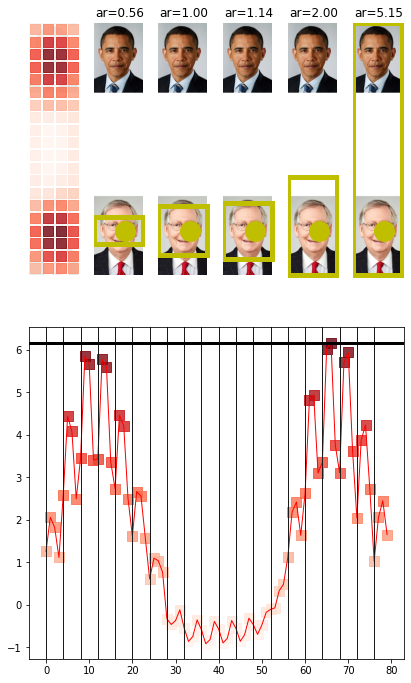

In [ ]:
for img_path in data_dir.glob("*.jpeg"):
    print(img_path)
    model.plot_img_crops(img_path)

    plt.savefig(img_path.parent / Path(''.join(img_path.name.split('.')[:-1]) + '_processed.jpg'), bbox_inches="tight")    